In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import warnings #Ignores all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# DEFINE GRAPHING FUNCTION
# We define the function make_graph. 
# As for the inputs, it takes a dataframe with stock data,
# revenue data, and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles = ("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specifc = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1,col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datatime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

    

In [5]:
#Q1. Use yfinance to Extract Stock Data
# use the ticker function to enter the Tesla symbol of the stock 'TSLA'
tsla = yf.Ticker('TSLA')

In [7]:
tesla_data.reset_index(inplace=True)

In [6]:
tesla_data = tsla.history(period = '100y')
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,170.240005,170.690002,161.380005,161.479996,100245300,0.0,0.0
2024-04-16 00:00:00-04:00,156.740005,158.190002,153.750000,157.110001,97000000,0.0,0.0
2024-04-17 00:00:00-04:00,157.639999,158.330002,153.779999,155.449997,82439700,0.0,0.0


In [8]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
# Q2. Use Webscraping to Extract Tesla Revenue Data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text
html_data

'\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\n\t\t<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    \n\t\t\t\t\n\t\t\t\t&lt;ul style=\'margin-top:10p

In [10]:
#parse the html data 
soup = BeautifulSoup(html_data, 'html5lib')

In [11]:
#using BEAUTIFULSOUP
#find the table containing the Tesla revenue data
#table = soup.find('table', class_='historical_data_table table')
#convert the HTML table into a Dataframe using pandas:
#tesla_revenue = pd.read_html(str(table))[0]
#rename the column of the DataFrame
#tesla_revenue.columns = ['Date', 'Revenue']

In [12]:
#using read_html function:
tesla_revenue = pd.read_html(url)[0]
tesla_revenue.columns = ['Date', 'Revenue'] 

In [13]:
#To remove the comma and dollar sign from the Revenue column:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

In [14]:
# To remove the null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [15]:
tesla_revenue.tail(5)

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [16]:
#Q3 Use yfinance to Extract Stock Data


In [17]:
# Using the Ticker Function to extract the stock 'GameStop' with symbol GME
gme = yf.Ticker('GME')

In [19]:
# Using the ticker object and function history to extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.
gme_data = gme.history(period = '100y')
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,10.810000,10.840000,10.060000,10.060000,5086300,0.0,0.0
2024-04-16 00:00:00-04:00,10.000000,10.550000,9.950000,10.370000,4162100,0.0,0.0
2024-04-17 00:00:00-04:00,10.440000,10.590000,10.300000,10.300000,2096700,0.0,0.0


In [21]:
# Reset the index and display the dataframe using the head function
gme_data.reset_index(inplace = True)
gme_data.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [22]:
# Q4. Use Webscraping to Extract GME Revenue Data
url_2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url_2).text
html_data

'<!DOCTYPE html>\n<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->\n<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src=

In [23]:
# Parse the html data
soup = BeautifulSoup(html_data, 'html5lib')
soup

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue --><html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src="./G

In [25]:
#using BEAUTIFULSOUP

table = soup.find('table', class_='historical_data_table table')
#convert the HTML table into a Dataframe using pandas:
gme_revenue = pd.read_html(str(table))[0]
#rename the column of the DataFrame
gme_revenue.columns = ['Date', 'Revenue']

In [28]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',','').str.replace('$','')

In [29]:
gme_revenue.tail(5)

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [1]:
# Q5 Plot Tesla Stock Graph
def make_graph(tesla_data, tesla_revenue, title):
    # Your implementation of the make_graph function
    # This function should plot the Tesla Stock Data and Tesla revenue data
    # It should also set the title of the graph
    
    # Example implementation:
    import matplotlib.pyplot as plt
    
    # Plotting Tesla stock data (assuming 'Date' is the column containing date information)
    plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Data')
    
    # Plotting Tesla revenue data (assuming 'Date' is the common column between tesla_revenue and tesla_data)
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label='Tesla Revenue Data')
    
    # Adding title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Adding legend
    plt.legend()
    
    # Show the plot
    plt.show()

# Call the make_graph function with the required parameters
make_graph(tesla_data, tesla_revenue, 'Tesla')


NameError: name 'make_graph' is not defined

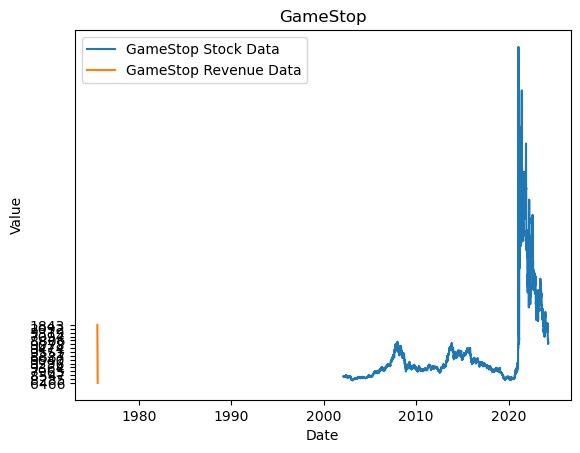

In [39]:
# Q6 Plot GameStop Stock Graph
def make_graph(gme_data, gme_revenue, title):
    # Your implementation of the make_graph function
    # This function should plot the Tesla Stock Data and Tesla revenue data
    # It should also set the title of the graph
    
    # Example implementation:
    import matplotlib.pyplot as plt
    
    # Plotting Tesla stock data (assuming 'Date' is the column containing date information)
    plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Data')
    
    # Plotting Tesla revenue data (assuming 'Date' is the common column between tesla_revenue and tesla_data)
    plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], label='GameStop Revenue Data')
    
    # Adding title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')

    # Adding legend
    plt.legend()
    
    # Show the plot
    plt.show()

# Call the make_graph function with the required parameters
make_graph(gme_data, gme_revenue, 'GameStop')
